In [1]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
#loading dataset images and mask
def load_dataset(path):
    images = sorted(glob(os.path.join(path, "images", "*")))
    masks = sorted(glob(os.path.join(path, "masks", "*")))
    return images, masks

In [3]:
#execution
dataset_path ="C:/Users/asus/Desktop/melasmafinal/shraddhamodifieddataset/final"

images, masks = load_dataset(dataset_path)
print(f"Images: {len(images)} Masks: {len(masks)}")

Images: 229 Masks: 229


In [ ]:
for x, y in zip(images, masks):
    print(x, y)

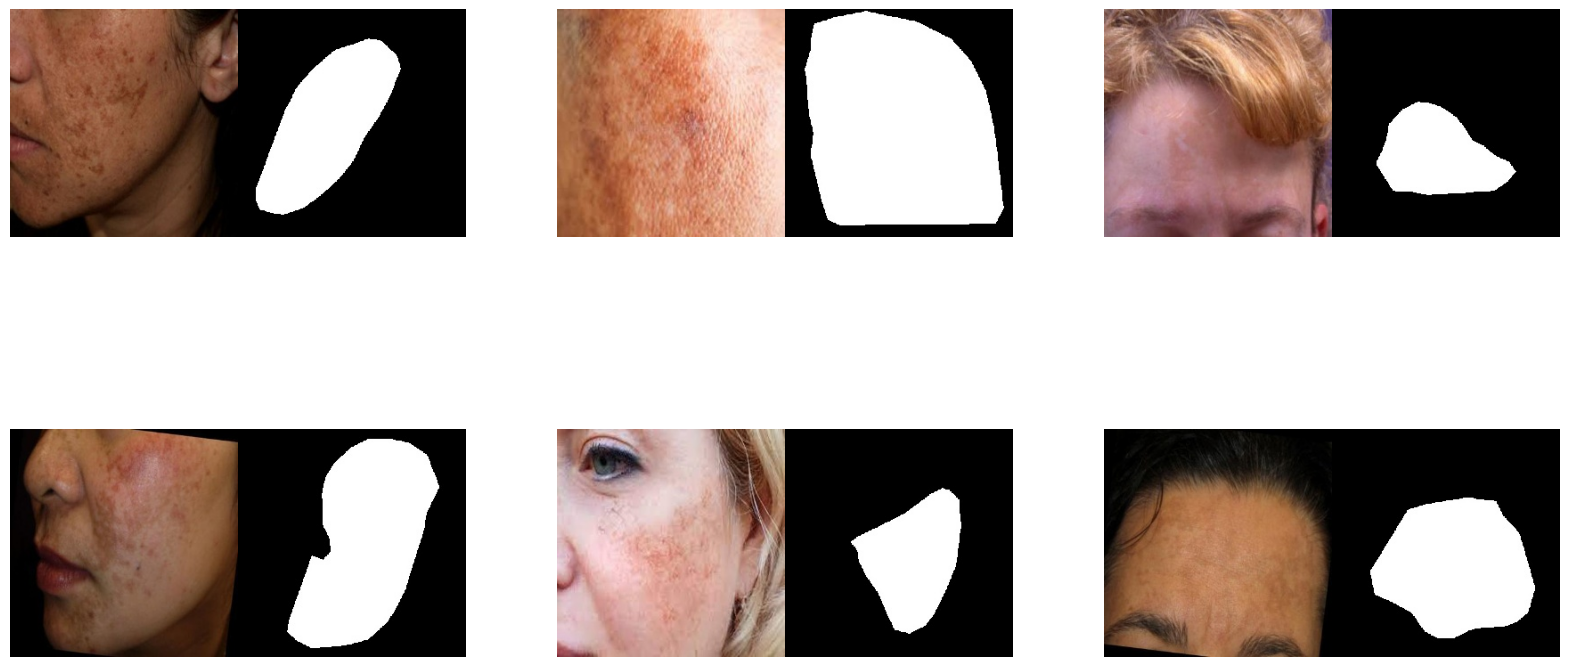

In [5]:
#visualize data

from imshowtools import imshow

cat = []

for x, y in zip(images[:6], masks[:6]):
    x = cv2.imread(x, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    y = cv2.imread(y, cv2.IMREAD_COLOR)
    z = np.concatenate([x, y], axis=1)
    cat.append(z)

imshow(*cat, size=(20, 10), columns=3)


In [6]:
#split dataset
def split_dataset(images, masks, split=0.1):
    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)


In [7]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = split_dataset(images, masks, split=0.1)

print(f"Train: {len(train_x)} {len(train_y)}")
print(f"Valid: {len(valid_x)} {len(valid_y)}")
print(f"Test: {len(test_x)} {len(test_y)}")


Train: 185 185
Valid: 22 22
Test: 22 22


In [8]:
#savedataset


def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
save_dir = os.path.join("C:/Users/asus/Desktop/melasmafinal/shraddhamodifieddataset/dataset", "C:/Users/asus/Desktop/melasmafinal/shraddhamodifieddataset/dataset/nonaug")

for item in ["train", "valid", "test"]:
    create_dir(os.path.join(save_dir, item, "images"))
    create_dir(os.path.join(save_dir, item, "masks"))






In [9]:
def save_dataset(images, masks, save_dir):
    for x, y in tqdm(zip(images, masks), total=len(images)):
        name = os.path.basename(x)  # Extract file name using os.path.basename
        x_img = cv2.imread(x, cv2.IMREAD_COLOR)
        y_img = cv2.imread(y, cv2.IMREAD_COLOR)
        save_image_path = os.path.join(save_dir, "images", name)
        save_mask_path = os.path.join(save_dir, "masks", name)
        cv2.imwrite(save_image_path, x_img)
        cv2.imwrite(save_mask_path, y_img)


In [10]:
# Saving the training dataset
save_dataset(train_x, train_y, os.path.join(save_dir, "train"))

# Saving the validation dataset
save_dataset(valid_x, valid_y, os.path.join(save_dir, "valid"))

# Saving the testing dataset
save_dataset(test_x, test_y, os.path.join(save_dir, "test"))


100%|███████████████████████████████████| 22/22 [00:00<00:00, 66.09it/s]
